## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

## Part One: Understanding the Background and Data


### Background : [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.


`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
# Fandango is rounding up the ratings to show stars.
# Makes sense. Can have 3 categories only - no star, half star or full star.

In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [7]:
fandango.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES'], dtype='object')

In [8]:
fandango.index

RangeIndex(start=0, stop=504, step=1)

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

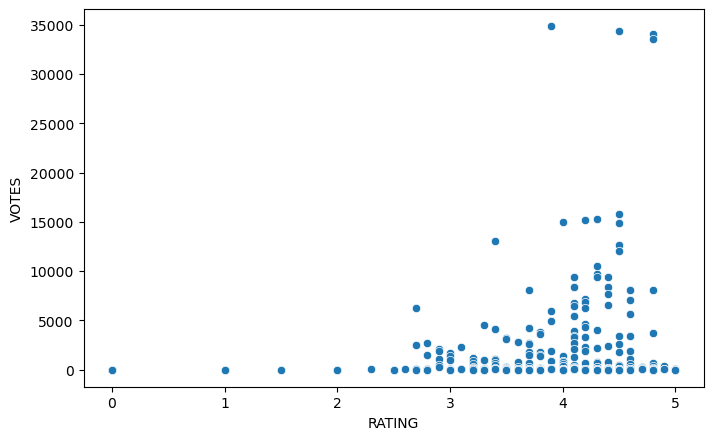

In [9]:
# Creating a scatterplot showing relationship between rating and votes. 
# Aim is to explore the relationship between popularity of a film and its rating.

plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(x='RATING',y='VOTES',data=fandango)

In [10]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [11]:
# No perfect correlation between stars and rating.

In [12]:
fandango['FILM']

0               Fifty Shades of Grey (2015)
1                     Jurassic World (2015)
2                    American Sniper (2015)
3                          Furious 7 (2015)
4                         Inside Out (2015)
                       ...                 
499                        Valiyavan (2015)
500              WWE SummerSlam 2015 (2015)
501         Yagavarayinum Naa Kaakka (2015)
502    Yesterday, Today and Tomorrow (1964)
503                           Zarafa (2012)
Name: FILM, Length: 504, dtype: object

In [13]:
fandango['FILM'].iloc[:5]

0    Fifty Shades of Grey (2015)
1          Jurassic World (2015)
2         American Sniper (2015)
3               Furious 7 (2015)
4              Inside Out (2015)
Name: FILM, dtype: object

Every row in the FILM title column has the same format:

    Film Title Name (Year)
    
Creating a new column that is able to strip the year from the title strings.

In [14]:
import re

In [15]:
def movie_year(movie):
    pattern = r'(\d{4})'
    year = re.search(pattern=pattern,string=movie)
    return int(year.group())

In [16]:
fandango['FILM'].apply(movie_year)

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: FILM, Length: 504, dtype: int64

In [17]:
fandango['YEAR'] = fandango['FILM'].apply(movie_year)

In [18]:
fandango.head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [19]:
# Another way :-

# 1. Split the string at first instance of a bracket.  
#    Eg. title = 'Film Title Name (Year)'
#        title.split('(')
#        ['Film Title Name','Year)']

# 2. Grab last item. Replace ) in 'Year)'     
#        title.split('(')[-1].replace(')','')

# 3. fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [20]:
# Distinct entries in year column in the dataframe

fandango['YEAR'].unique()

array([2015, 2014, 2016, 1001, 1964, 2012], dtype=int64)

In [21]:
# 1964 and 1001 are anomalies.

In [22]:
fandango[fandango['YEAR']==1964]

,FILM,STARS,RATING,VOTES,YEAR
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [23]:
# Random entry but okay.

In [24]:
fandango[fandango['YEAR']==1001]

,FILM,STARS,RATING,VOTES,YEAR
385,1001 Grams (2015),3.0,3.0,2,1001


In [25]:
# Will replace year for this particular entry.

In [26]:
fandango.replace(to_replace=fandango.iloc[385]['YEAR'],value=2015,inplace=True)

In [27]:
fandango.iloc[385]

FILM      1001 Grams (2015)
STARS                   3.0
RATING                  3.0
VOTES                     2
YEAR                   2015
Name: 385, dtype: object

In [28]:
fandango['YEAR'].unique()

array([2015, 2014, 2016, 1964, 2012], dtype=int64)

In [29]:
# No. of movies grouped by year

fandango['YEAR'].value_counts()

2015    477
2014     24
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

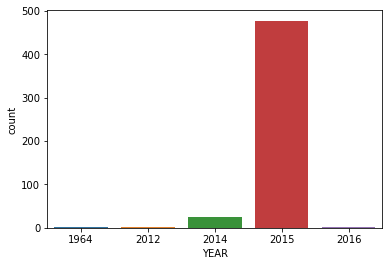

In [30]:
# Visualizing above data 

sns.countplot (data=fandango,x='YEAR')

In [31]:
# Lots of ways to do it.

# fandango['YEAR'].value_counts().plot.bar() 

# sns.barplot(x=fandango['YEAR'].value_counts().index,y=fandango['YEAR'].value_counts().values)

In [32]:
# op 10 movies with highest number of votes

fandango.nlargest(10,columns='VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [33]:
# Movies with zero votes

len(fandango[fandango['VOTES']==0])

69

Will create DataFrame of only reviewed films by removing any films that have zero votes.

In [34]:
fandango_reviewed = fandango[fandango['VOTES']!=0]


**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Will visualize this difference in distributions.**

<AxesSubplot:xlabel='RATING', ylabel='Density'>

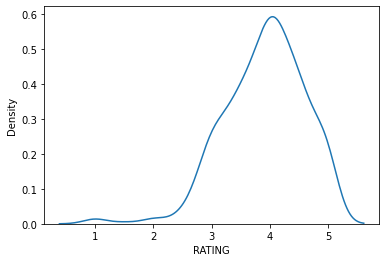

In [35]:
sns.kdeplot(x=fandango_reviewed['RATING'])

<AxesSubplot:xlabel='RATING', ylabel='Density'>

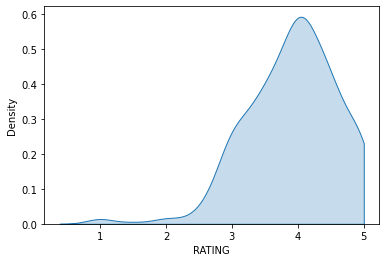

In [36]:
sns.kdeplot(x=fandango_reviewed['RATING'],clip=(0,5),label='True Rating',fill=True)

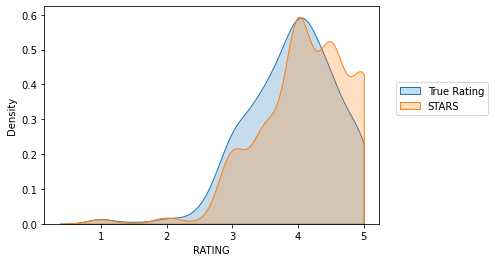

In [37]:
sns.kdeplot(x=fandango_reviewed['RATING'],clip=(0,5),label='True Rating',fill=True)
sns.kdeplot(x=fandango_reviewed['STARS'],clip=(0,5),label='STARS',fill=True)

plt.legend(loc=(1.05,0.5))

In [38]:
# Quantifying discrepancies mentioned above 

fandango_reviewed['STARS-RATING'] = np.round(fandango_reviewed['STARS']-fandango_reviewed['RATING'],decimals=1)

C:\Users\amols\AppData\Local\Temp/ipykernel_4812/2479727885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_reviewed['STARS-RATING'] = np.round(fandango_reviewed['STARS']-fandango_reviewed['RATING'],decimals=1)


In [39]:
# Above not an error but a warning. Refer provided link for caveat.

# Aware that above is a copy of a slice from df. Can make a new df using .copy but more df means more memory occupied in RAM.

In [40]:
fandango_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS-RATING
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


In [ ]:
# Creating a countplot to display the number of times a certain difference occurs:

<AxesSubplot:xlabel='STARS-RATING', ylabel='count'>

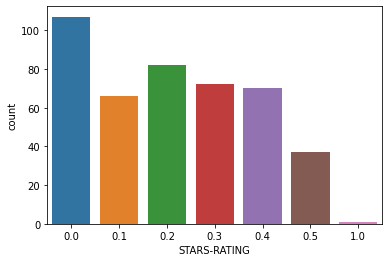

In [41]:
sns.countplot(x=fandango_reviewed['STARS-RATING'])

In [42]:
# There is/are movie(s) where stars shown are 1 more than rating on a 0-5 scale.

It can see from the plot that one movie was displaying over a 1 star difference than its true rating! 

In [43]:
fandango_reviewed[fandango_reviewed['STARS-RATING']==1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS-RATING
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [44]:
# Unusual star display for Turbo Kid.

## Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

In [45]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [46]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [47]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

In [48]:
all_sites.index

RangeIndex(start=0, stop=146, step=1)

In [49]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [50]:
all_sites.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RottenTomatoes,146.0,60.849315,30.168799,5.0,31.25,63.50,89.00,100.0
RottenTomatoes_User,146.0,63.876712,20.024430,20.0,50.00,66.50,81.00,94.0
Metacritic,146.0,58.808219,19.517389,13.0,43.50,59.00,75.00,94.0
Metacritic_User,146.0,6.519178,1.510712,2.4,5.70,6.85,7.50,9.6
IMDB,146.0,6.736986,0.958736,4.0,6.30,6.90,7.40,8.6
Metacritic_user_vote_count,146.0,185.705479,316.606515,4.0,33.25,72.50,168.50,2375.0
IMDB_user_vote_count,146.0,42846.205479,67406.509171,243.0,5627.00,19103.00,45185.75,334164.0


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

(0.0, 100.0)

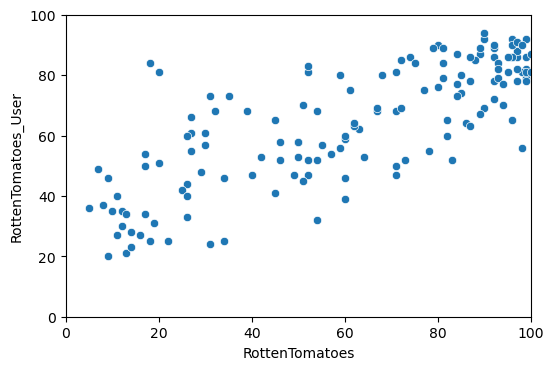

In [51]:
plt.figure(dpi=100)
sns.scatterplot(x=all_sites['RottenTomatoes'],y=all_sites['RottenTomatoes_User'])
plt.xlim(0,100)
plt.ylim(0,100)

In [52]:
# Usually, if critics liked the movie there are high chances that people will also like it.

# There is generally a linear relationship.

# There are some exceptions. Like the two outliers high on user ratings but low on critics rating.

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

In [53]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

# High positive values will mean critics liked movie more than users.

# High negative values will mean users liked movie more than critics.

In [54]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**On average, how far off are critics ratings than user ratings?**

In [55]:
# Mean Absolute Difference between RT scores and RT User scores

np.mean(abs(all_sites['Rotten_Diff']))

15.095890410958905

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

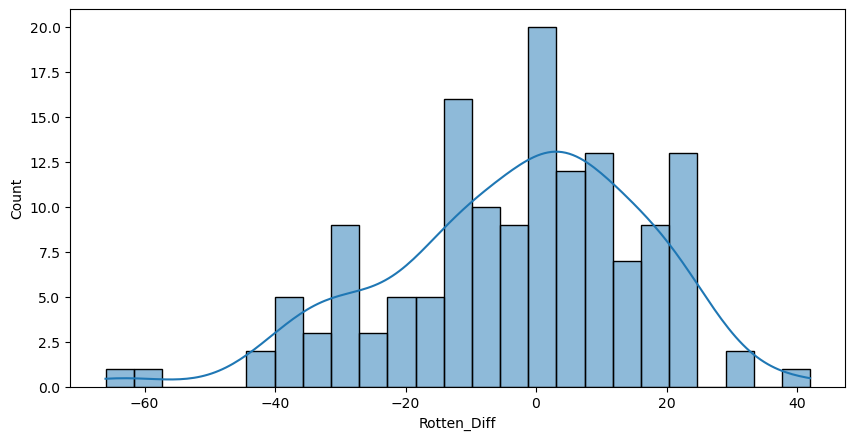

In [56]:
plt.figure(figsize=(10,5),dpi=100)
sns.histplot(x = all_sites['Rotten_Diff'],kde=True,bins=25)

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

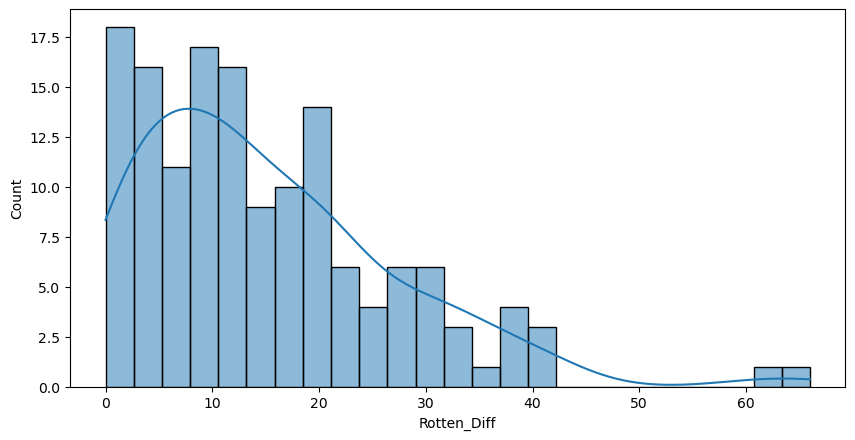

In [57]:
plt.figure(figsize=(10,5),dpi=100)
sns.histplot(x = abs(all_sites['Rotten_Diff']),kde=True,bins=25)

**Let's find out which movies are causing the largest differences. First, showing the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

In [58]:
# Top 5 movies users rated higher than critics on average:

all_sites.nsmallest(5,'Rotten_Diff') # Rotten_Diff is Critics - User

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


In [59]:
all_sites.nsmallest(5,'Rotten_Diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

**Showing the top 5 movies critics scores higher than users on average.**

In [60]:
# Top 5 movies critics scores higher than users on average.

all_sites.nlargest(5,'Rotten_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


In [61]:
all_sites.nlargest(5,'Rotten_Diff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

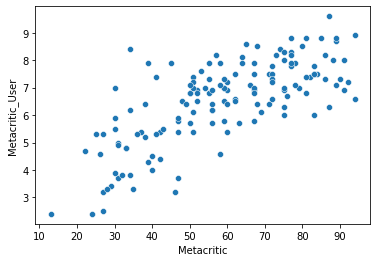

In [62]:
sns.scatterplot(x=all_sites['Metacritic'],y=all_sites['Metacritic_User'])

In [63]:
# Metacritic scores are on different scales.

# Metacritic_User is from 0 to 10

# Metacritic from 0 to 100

(0.0, 10.0)

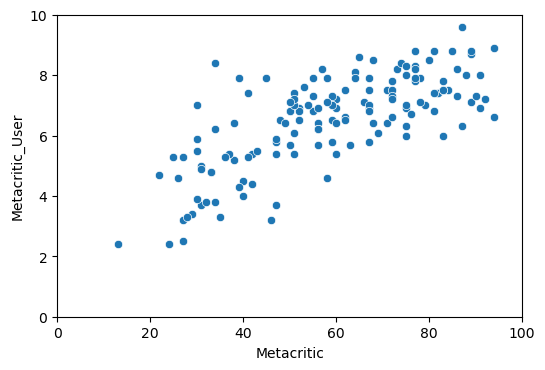

In [64]:
plt.figure(dpi=100)
sns.scatterplot(x=all_sites['Metacritic'],y=all_sites['Metacritic_User'])
plt.xlim(0,100)
plt.ylim(0,10)

In [65]:
# Overall, a linear relationship.

# Don't have outliers as in the case of Rotten Tomatoes

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

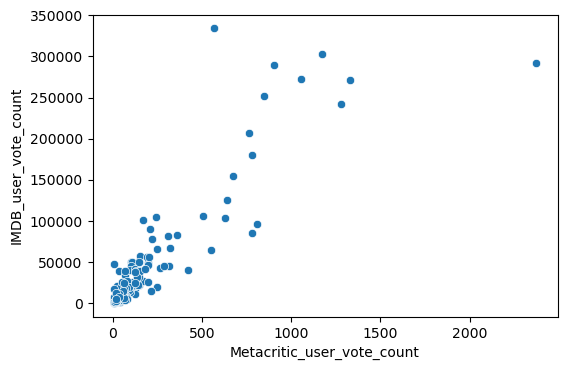

In [66]:
plt.figure(dpi=100)
sns.scatterplot(x=all_sites['Metacritic_user_vote_count'],y=all_sites['IMDB_user_vote_count'])

In [67]:
# Again, linear relationship.

# Two outliers.

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings.**

In [68]:
np.max(all_sites['IMDB_user_vote_count'])

334164

In [69]:
all_sites[all_sites['IMDB_user_vote_count']==334164]

# Alternatively, all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Pinpointing movie that has the highest Metacritic User Vote count**

In [70]:
np.max(all_sites['Metacritic_user_vote_count'])

2375

In [71]:
all_sites[all_sites['Metacritic_user_vote_count']==2375]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

In this section, I explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

Note:-

1. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. 

2. Comparison made only for those movies that are in both DataFrames

In [72]:
comb_df = pd.merge(left=fandango,right=all_sites,how='inner',on='FILM')

In [73]:
comb_df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


In [74]:
comb_df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff'],
      dtype='object')

From combined dataframe, can notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, I normalize these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

In [75]:
comb_df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
YEAR                            2015.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [76]:
# How to normalize numbers between a specified range:-

# https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range

In [77]:
# 5 columns to normalize between 0 and 5. 
# 'RottenTomatoes','RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB'

# For precision handling:
# https://www.geeksforgeeks.org/precision-handling-python/

col = ['RottenTomatoes','RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB']

def normalize_df (val):
    num = ((val-b)/(a-b))*5
    num = f'{num:.1f}'
    return float(num)

for i in range (0,5,1):
    a = np.max(comb_df[f'{col[i]}'])
    b = np.min(comb_df[f'{col[i]}'])
    comb_df[f'{col[i]}'] = comb_df[f'{col[i]}'].apply(normalize_df)
    i=i+1

comb_df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,1.1,1.5,2.0,0.6,0.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,3.5,4.1,2.8,3.2,3.6,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,3.5,4.4,3.6,2.9,3.7,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,4.0,4.3,3.3,3.1,3.7,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,4.9,4.7,5.0,4.5,5.0,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,4.3,2.9,3.4,2.8,2.9,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,4.7,4.1,4.6,2.7,3.3,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,4.6,4.3,3.3,3.2,4.1,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,4.7,4.5,4.5,3.4,3.7,14,696,9


In [78]:
norm_scores = comb_df[['FILM', 'STARS', 'RATING','RottenTomatoes','RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',]]

In [79]:
norm_scores

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,Fifty Shades of Grey (2015),4.0,3.9,1.1,1.5,2.0,0.6,0.2
1,Jurassic World (2015),4.5,4.5,3.5,4.1,2.8,3.2,3.6
2,American Sniper (2015),5.0,4.8,3.5,4.4,3.6,2.9,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.3,3.3,3.1,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.7,5.0,4.5,5.0
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.3,2.9,3.4,2.8,2.9
141,The Diary of a Teenage Girl (2015),4.0,3.6,4.7,4.1,4.6,2.7,3.3
142,The Wrecking Crew (2015),4.5,4.2,4.6,4.3,3.3,3.2,4.1
143,Tangerine (2015),4.0,3.9,4.7,4.5,4.5,3.4,3.7


In [80]:
norm_scores['RottenTomatoes_User'].unique()

array([1.5, 4.1, 4.4, 4.3, 4.7, 3.7, 2.2, 4.5, 2. , 4.6, 2.6, 3.4, 4.2,
       3. , 3.6, 5. , 4.9, 2.8, 1.8, 3.1, 0. , 2.7, 1.9, 2.3, 3.2, 2.4,
       3.9, 1.4, 2.5, 1.1, 1. , 0.3, 4. , 1.3, 0.7, 0.5, 2.9, 0.2, 3.3,
       2.1, 0.9, 4.8, 1.6, 0.1, 3.8, 0.8, 1.7, 3.5])

### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?

Quick Note: for any issues moving the legend for a seaborn kdeplot: https://github.com/mwaskom/seaborn/issues/2280

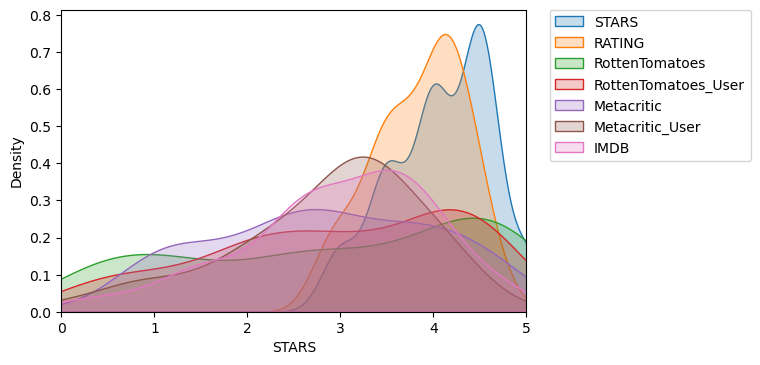

In [81]:
plt.figure(dpi=100)
sns.kdeplot(x=norm_scores['STARS'],shade=True,label='STARS')
sns.kdeplot(x=norm_scores['RATING'],shade=True,label='RATING')
sns.kdeplot(x=norm_scores['RottenTomatoes'],shade=True,label='RottenTomatoes')
sns.kdeplot(x=norm_scores['RottenTomatoes_User'],shade=True,label='RottenTomatoes_User')
sns.kdeplot(x=norm_scores['Metacritic'],shade=True,label='Metacritic')
sns.kdeplot(x=norm_scores['Metacritic_User'],shade=True,label='Metacritic_User')
sns.kdeplot(x=norm_scores['IMDB'],shade=True,label='IMDB')
plt.xlim(0,5)
plt.legend(loc=(1.05,0.5))

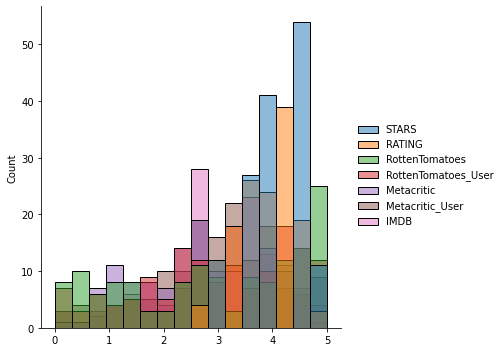

In [82]:
# Alternatively

sns.displot(data=norm_scores.drop('FILM',axis=1))

In [83]:
# Cubersome to understand

(0.0, 5.0)

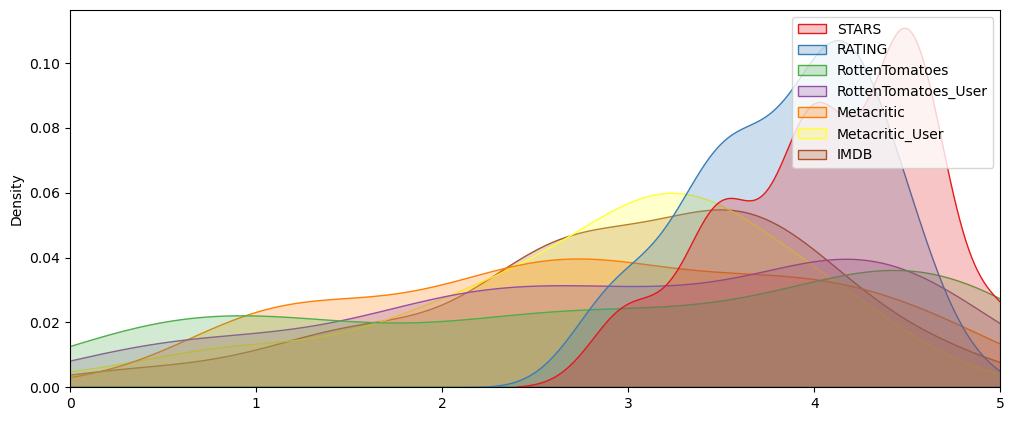

In [84]:
# Easier way :-

plt.figure(figsize=(12,5),dpi=100)
sns.kdeplot(data=norm_scores.drop('FILM',axis=1),shade=True,palette='Set1')
plt.xlim(0,5)

**Clearly Fandango has an uneven distribution.Can also see that RT critics have the most uniform distribution.** 

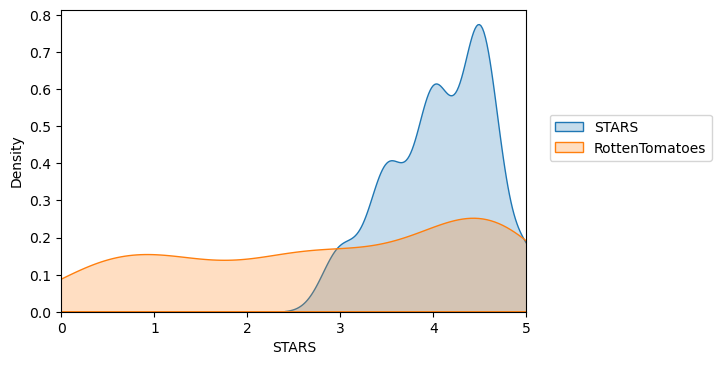

In [85]:
plt.figure(dpi=100)
sns.kdeplot(x=norm_scores['STARS'],shade=True,label='STARS')
sns.kdeplot(x=norm_scores['RottenTomatoes'],shade=True,label='RottenTomatoes')
plt.xlim(0,5)
plt.legend(loc=(1.05,0.5))

In [86]:
# On Fandango, it is extremely unlikely to even score below 3 stars implying there are no bad movies.


### How are the worst movies rated across all platforms?

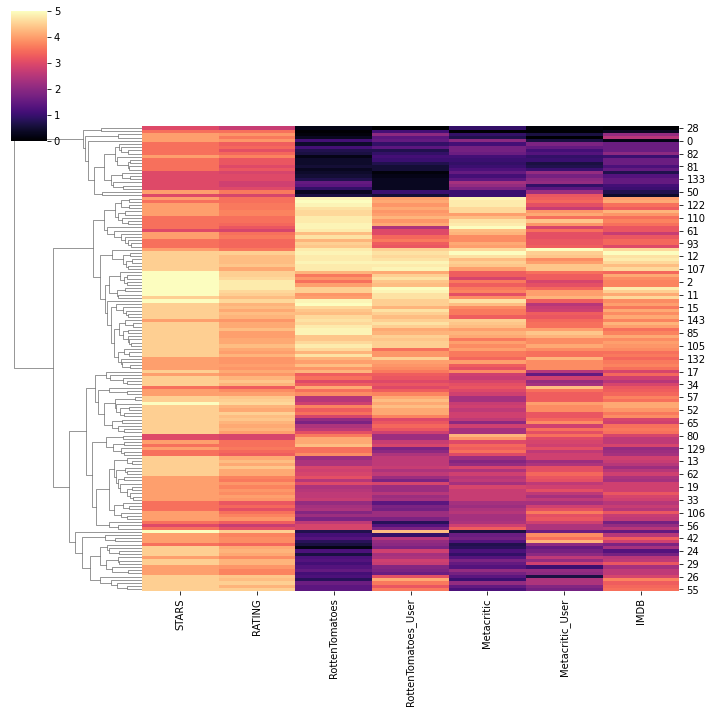

In [87]:
sns.clustermap(data=norm_scores.drop('FILM',axis=1),cmap='magma',col_cluster=False)

In [88]:
# Clustermap is clustering movies together based off their ratings across all sites.

# It is very likely that if a movie is really bad, more sites are going to rate it poorly.So, those will get clustered together.

# Can see clearly, while other sites are rating movies poorly (darker bands), Fandango is nowhere even close.

# Critics from Rotten Tomatoes are most stringent towards ratings.

In [89]:
norm_scores.nsmallest(10,'RottenTomatoes')

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.0,1.1,0.0,0.0,0.3
84,Hitman: Agent 47 (2015),4.0,3.9,0.1,2.0,0.9,0.6,2.1
25,Taken 3 (2015),4.5,4.1,0.2,1.8,0.8,1.5,2.3
28,Fantastic Four (2015),3.0,2.7,0.2,0.0,0.9,0.1,0.0
54,Hot Pursuit (2015),4.0,3.7,0.2,1.1,1.1,0.9,1.0
50,The Boy Next Door (2015),4.0,3.6,0.3,1.0,1.0,2.2,0.7
87,Unfinished Business (2015),3.5,3.2,0.3,0.5,1.2,1.0,1.5
88,The Loft (2015),4.0,3.6,0.3,1.4,0.7,0.0,2.5
77,Seventh Son (2015),3.5,3.2,0.4,1.0,1.0,1.0,1.6
78,Mortdecai (2015),3.5,3.2,0.4,0.7,0.9,0.6,1.6


In [90]:
worst_films = norm_scores.nsmallest(10,'RottenTomatoes')

**Visualizing the distribution of ratings across all sites for the top 10 worst movies.**

<AxesSubplot:ylabel='Density'>

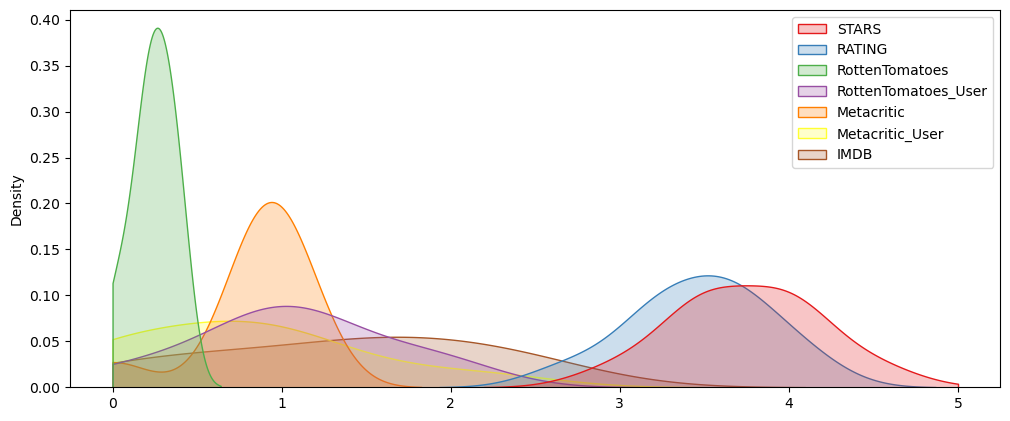

In [91]:
plt.figure(figsize=(12,5),dpi=100)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')

In [92]:
# Even for 10 worst movies in df, distribution for fandango scores is centered around 3.5, showing them as average movies.

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Notice the biggest offender, Taken 3!. Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.32](https://en.wikipedia.org/wiki/Taken_3#Critical_response)  across the other platforms!**

In [93]:
norm_scores[norm_scores['FILM']=='Taken 3 (2015)']

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
25,Taken 3 (2015),4.5,4.1,0.2,1.8,0.8,1.5,2.3


In [96]:
0.2+1.8+0.8+1.5+2.3

6.6

In [97]:
# Average rating across all other sites
6.6/5

1.3199999999999998

----